In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [10]:
df = pd.read_csv(r'/content/air traffic.csv')

In [11]:
df.shape

(249, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [28]:
#For removing commas and converting into integer datatype

In [17]:
for col in ['Dom_Pax','Int_Pax','Pax']:
  df[col]=df[col].replace({',': ''},regex=True).astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    int64  
 3   Int_Pax  249 non-null    int64  
 4   Pax      249 non-null    int64  
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(5), object(9)
memory usage: 33.2+ KB


In [20]:
df['Date']=pd.to_datetime(df[['Year','Month']].assign(Day=1))
df=df.set_index('Date').sort_index()

In [21]:
print(df.head())

            Year  Month   Dom_Pax  Int_Pax       Pax  Dom_Flt Int_Flt  \
Date                                                                    
2003-01-01  2003      1  43032450  4905830  47938280  785,160  57,667   
2003-02-01  2003      2  41166780  4245366  45412146  690,351  51,259   
2003-03-01  2003      3  49992700  5008613  55001313  797,194  58,926   
2003-04-01  2003      4  47033260  4345444  51378704  766,260  55,005   
2003-05-01  2003      5  49152352  4610834  53763186  789,397  55,265   

                Flt     Dom_RPM     Int_RPM         RPM     Dom_ASM  \
Date                                                                  
2003-01-01  842,827  36,211,422  12,885,980  49,097,402  56,191,300   
2003-02-01  741,610  34,148,439  10,715,468  44,863,907  50,088,434   
2003-03-01  856,120  41,774,564  12,567,068  54,341,633  57,592,901   
2003-04-01  821,265  39,465,980  10,370,592  49,836,572  54,639,679   
2003-05-01  844,662  41,001,934  11,575,026  52,576,960  55,34

In [22]:
cols_to_clean = ['Dom_Pax', 'Int_Pax', 'Pax', 'Dom_Flt', 'Int_Flt', 'Flt',
                 'Dom_RPM', 'Int_RPM', 'RPM', 'Dom_ASM', 'Int_ASM', 'ASM']

for col in cols_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True).astype(int)


In [23]:
print(df.dtypes)

Year                int64
Month               int64
Dom_Pax             int64
Int_Pax             int64
Pax                 int64
Dom_Flt             int64
Int_Flt             int64
Flt                 int64
Dom_RPM             int64
Int_RPM             int64
RPM                 int64
Dom_ASM             int64
Int_ASM             int64
ASM                 int64
Dom_LF            float64
Int_LF            float64
LF                float64
date       datetime64[ns]
dtype: object


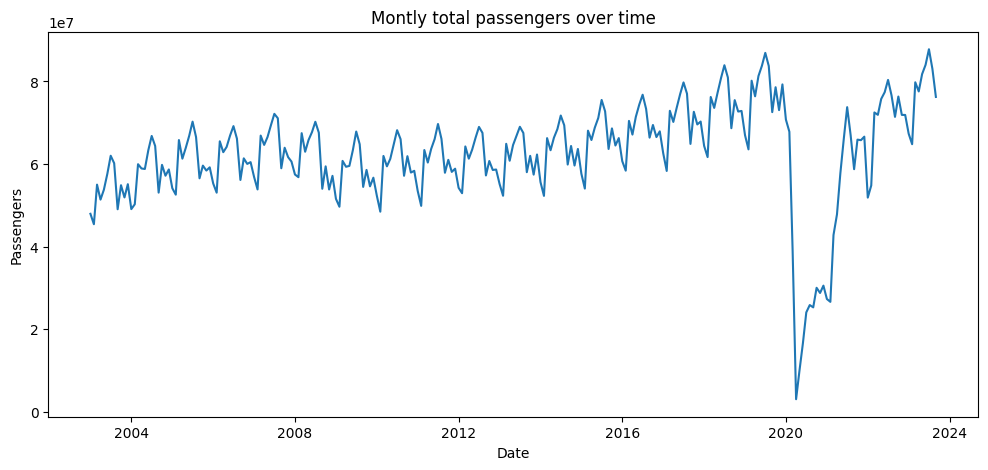

In [27]:
plt.figure(figsize=(12,5))
plt.plot(df['Pax'])
plt.title('Montly total passengers over time')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

In [29]:
#For checking Stationary


In [30]:
result = adfuller(df['Pax'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.40045180193928
p-value: 0.010943479350997296


In [31]:
df['Pax_diff'] = df['Pax'].diff().dropna()


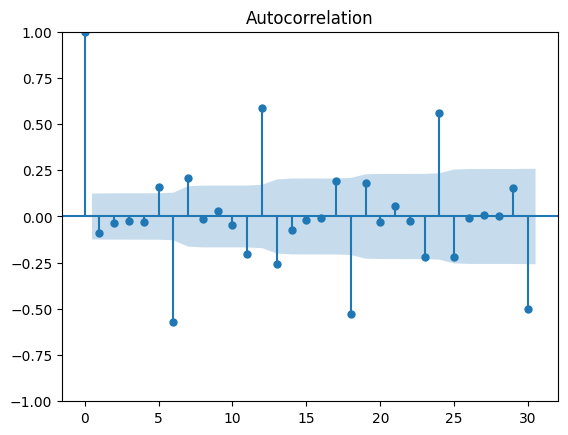

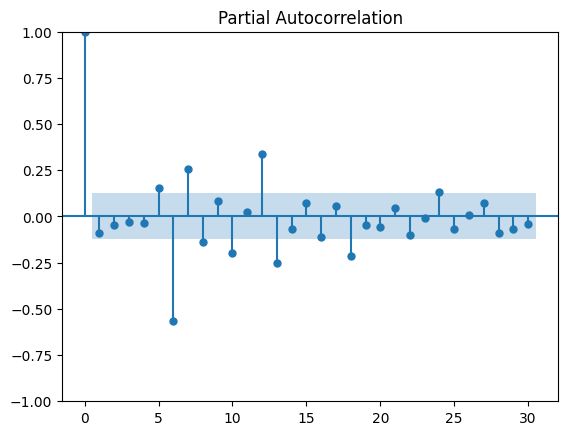

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Pax'].diff().dropna(), lags=30)
plot_pacf(df['Pax'].diff().dropna(), lags=30)
plt.show()


In [33]:
model = ARIMA(df['Pax'], order=(1,1,1))  # tweak (p,d,q) later
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Pax   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4243.124
Date:                Sun, 31 Aug 2025   AIC                           8492.247
Time:                        17:44:34   BIC                           8502.788
Sample:                    01-01-2003   HQIC                          8496.490
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8892      0.030     29.789      0.000       0.831       0.948
ma.L1         -0.9854      0.017    -58.418      0.000      -1.018      -0.952
sigma2      4.368e+13   2.51e-16   1.74e+29      0.0

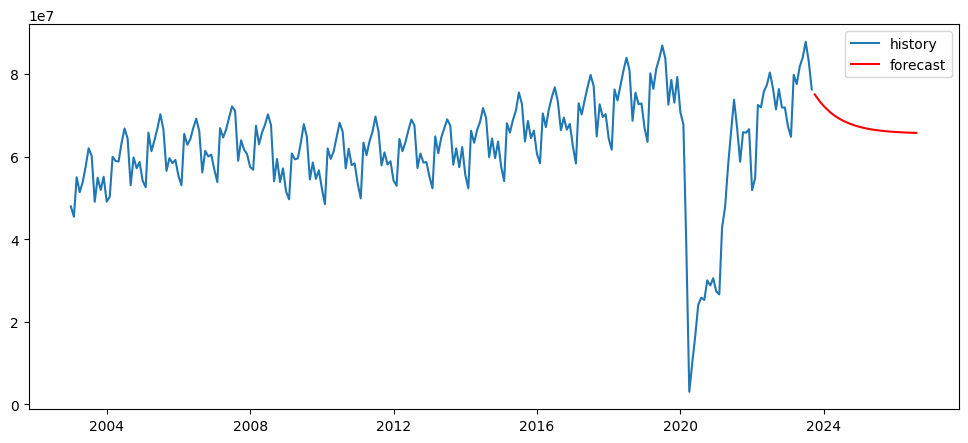

In [36]:
forecast = model_fit.forecast(steps=35)

plt.figure(figsize=(12,5))
plt.plot(df['Pax'], label='history')
plt.plot(forecast, label='forecast', color='red')
plt.legend()
plt.show()
